# Pre-Processing

In [1]:
#load python packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load data 
df = pd.read_csv('Absenteeism_at_work_df.csv', index_col=0)
df.head()

,ID,Absence_reason,Absence_month,Absence_day,Seasons,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,...,Weight,Height,Body_mass_index,Hours_Absent,Absence_reason_description,Absence_month_description,Absence_day_description,Education_description,Seasons_description,Day_Absent
0,11,26,7,3,1,289,36,13,33,239.554,...,90,172,30,4,unjustified absence,July,Tuesday,high school,Winter,0
1,36,0,7,3,1,118,13,18,50,239.554,...,98,178,31,0,NaN,July,Tuesday,high school,Winter,0
2,3,23,7,4,1,179,51,18,38,239.554,...,89,170,31,2,medical consultation,July,Wednesday,high school,Winter,0
3,7,7,7,5,1,279,5,14,39,239.554,...,68,168,24,4,Diseases of the eye and adnexa,July,Thursday,high school,Winter,0
4,11,23,7,5,1,289,36,13,33,239.554,...,90,172,30,2,medical consultation,July,Thursday,high school,Winter,0


## Create dummy or indicator features for categorical variables

In [3]:
df_dummy = pd.get_dummies(data=df[['Education_description', 'Absence_reason_description', 'Absence_month_description', 'Seasons_description', 'Absence_day_description']])
df_dummy.head()

,Education_description_graduate,Education_description_high school,Education_description_master and doctor,Education_description_postgraduate,Absence_reason_description_Certain conditions originating in the perinatal period,Absence_reason_description_Certain infectious and parasitic diseases,"Absence_reason_description_Congenital malformations, deformations and chromosomal abnormalities",Absence_reason_description_Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,Absence_reason_description_Diseases of the circulatory system,Absence_reason_description_Diseases of the digestive system,...,Absence_month_description_September,Seasons_description_Fall,Seasons_description_Spring,Seasons_description_Summer,Seasons_description_Winter,Absence_day_description_Friday,Absence_day_description_Monday,Absence_day_description_Thursday,Absence_day_description_Tuesday,Absence_day_description_Wednesday
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## Standardize the magnitude of numeric features using a scaler

In [5]:
df.columns

Index(['ID', 'Absence_reason', 'Absence_month', 'Absence_day', 'Seasons',
       'Transportation_expense', 'Distance_residence_work', 'Service_time',
       'Age', 'Work load Average/day ', 'Hit_target', 'Disciplinary_failure',
       'Education', 'Number_children', 'Social_drinker', 'Social_smoker',
       'Number_pet', 'Weight', 'Height', 'Body_mass_index', 'Hours_Absent',
       'Absence_reason_description', 'Absence_month_description',
       'Absence_day_description', 'Education_description',
       'Seasons_description', 'Day_Absent'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler
drop_df = df.drop(['ID','Absence_reason', 'Absence_month', 'Absence_day', 'Seasons', 'Education', 'Absence_reason_description', 'Absence_month_description',
       'Absence_day_description', 'Education_description', 'Seasons_description',], axis=1)
names = drop_df.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(drop_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,Hit_target,Disciplinary_failure,Number_children,Social_drinker,Social_smoker,Number_pet,Weight,Height,Body_mass_index,Hours_Absent,Day_Absent
0,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932,-0.219511,-0.760148
1,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.017234,0.872872,-0.280566,-0.56624,1.473056,0.975828,1.009438,-0.519767,-0.760148
2,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.928191,0.872872,-0.280566,-0.56624,0.774000,-0.350671,1.009438,-0.369639,-0.760148
3,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,0.893723,0.872872,3.564226,-0.56624,-0.857131,-0.682295,-0.625100,-0.219511,-0.760148
4,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932,-0.369639,-0.760148


In [7]:
# Merge dummy and scaled variables 
df_concat = pd.concat([scaled_df, df_dummy], axis=1)
df_concat.columns

Index(['Transportation_expense', 'Distance_residence_work', 'Service_time',
       'Age', 'Work load Average/day ', 'Hit_target', 'Disciplinary_failure',
       'Number_children', 'Social_drinker', 'Social_smoker', 'Number_pet',
       'Weight', 'Height', 'Body_mass_index', 'Hours_Absent', 'Day_Absent',
       'Education_description_graduate', 'Education_description_high school',
       'Education_description_master and doctor',
       'Education_description_postgraduate',
       'Absence_reason_description_Certain conditions originating in the perinatal period',
       'Absence_reason_description_Certain infectious and parasitic diseases',
       'Absence_reason_description_Congenital malformations, deformations and chromosomal abnormalities',
       'Absence_reason_description_Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
       'Absence_reason_description_Diseases of the circulatory system',
       'Absence_reason_description_D

## Split into testing and training datasets

In [12]:
from sklearn.model_selection import train_test_split
df_concat.Day_Absent = df_concat.Day_Absent.astype(int)
X = df_concat.drop(['Day_Absent'], axis=1)
y = df_concat['Day_Absent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=629)

## Fit models with a training dataset & review outcomes 

### Model 1 - Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))

0.9684684684684685


In [19]:
import sklearn.model_selection
Cs = [0.001, 0.1, 1, 10, 100]
logistic = LogisticRegression()
hyperparameters = dict(C=Cs)
clf = sklearn.model_selection.GridSearchCV(logistic, hyperparameters)
best_model = clf.fit(X_test, y_test)
Best_C = best_model.best_estimator_.get_params()['C']
print('Best C:', Best_C)

Best C: 100


In [20]:
clf = LogisticRegression(C=Best_C)
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.990990990990991


/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Model 2 - Decision Tree

In [31]:
from sklearn import tree, metrics
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

entr_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

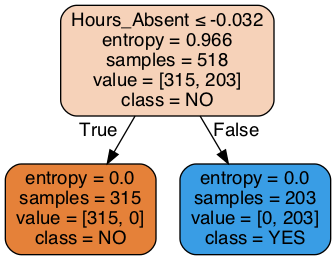

In [28]:
from sklearn.externals.six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree.export_graphviz(entr_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9954954954954955
Balanced accuracy: 0.9967532467532467


/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='YES' is not a valid label: array([0, 1])

In [30]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

gini_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

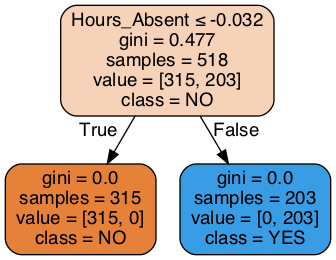

In [32]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9954954954954955
Balanced accuracy: 0.9967532467532467


/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='YES' is not a valid label: array([0, 1])

### Model 3 - Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFModel = RandomForestClassifier(max_depth=3, random_state = 1234)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

RFModel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [35]:
print("Random Forest Model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Random Forest Model - max depth 3
Accuracy: 0.990990990990991
Balanced accuracy: 0.9894003055767762


/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='YES' is not a valid label: array([0, 1])

## Identify Final Model